In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

In [5]:
train_path ="/content/drive/MyDrive/Agriculture Crops Classification/Agricultural-crops"

In [6]:
print(os.listdir(train_path))

['Tobacco-plant', 'rice', 'tomato', 'soyabean', 'pineapple', 'vigna-radiati(Mung)', 'wheat', 'sunflower', 'sugarcane', 'tea', 'Lemon', 'mustard-oil', 'papaya', 'gram', 'Pearl_millet(bajra)', 'maize', 'Fox_nut(Makhana)', 'jute', 'Olive-tree', 'jowar', 'cotton', 'cardamom', 'chilli', 'Coffee-plant', 'almond', 'Cucumber', 'banana', 'coconut', 'clove', 'Cherry']


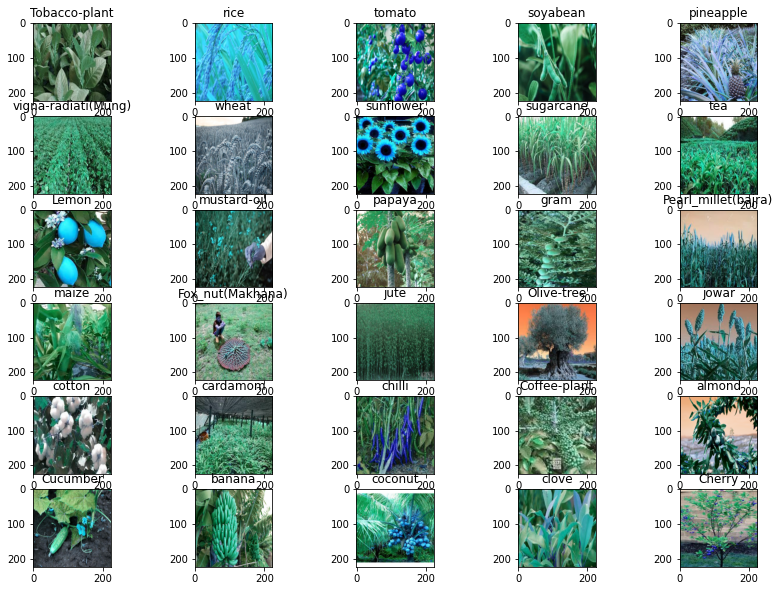

In [7]:
tob=os.path.join(train_path,"Tobacco-plant")
import cv2
from google.colab.patches import cv2_imshow
fig = plt.figure(figsize=(14, 10))
i=1
for folder in os.listdir(train_path):
  new_path=os.path.join(train_path,folder)
  for img in os.listdir(new_path):
    fig.add_subplot(6, 5, i)
    img=cv2.imread(os.path.join(new_path,img))
    dim = (224,224)
    new_img=cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    plt.imshow(new_img)
    plt.title(folder)
    break
  i=i+1


In [8]:
type(img)

numpy.ndarray

In [9]:
batch_size = 64
target_size = (224,224)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
    )

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="rgb",
        class_mode='categorical',
        subset='training',
        shuffle=True)

test_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="rgb",
        class_mode='categorical',
        subset='validation',
        shuffle=True
        )

Found 674 images belonging to 30 classes.
Found 155 images belonging to 30 classes.


In [10]:
import os

In [11]:
labels = sorted(os.listdir(train_path))
print(labels)

['Cherry', 'Coffee-plant', 'Cucumber', 'Fox_nut(Makhana)', 'Lemon', 'Olive-tree', 'Pearl_millet(bajra)', 'Tobacco-plant', 'almond', 'banana', 'cardamom', 'chilli', 'clove', 'coconut', 'cotton', 'gram', 'jowar', 'jute', 'maize', 'mustard-oil', 'papaya', 'pineapple', 'rice', 'soyabean', 'sugarcane', 'sunflower', 'tea', 'tomato', 'vigna-radiati(Mung)', 'wheat']


In [12]:
input_shape = (224,224,3) # img_rows, img_colums, color_channels
num_classes = len(labels)
print(num_classes)

30


In [13]:
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.layers import BatchNormalization
model = models.Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = input_shape))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(256, activation = "relu"))
model.add(Dense(30, activation = "softmax"))
optimizer = Adam()
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     7

In [14]:
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [15]:
num_epochs = 60
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_test   = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TRAIN)

10


In [16]:
model_train = model.fit(train_generator, epochs=num_epochs, verbose=1, 
                        validation_data=test_generator
                        )

Epoch 1/60
11/11 [==============================] - 18s 2s/step - loss: 3.4649 - accuracy: 0.0341 - val_loss: 3.4003 - val_accuracy: 0.0452
Epoch 2/60
11/11 [==============================] - 16s 1s/step - loss: 3.4007 - accuracy: 0.0475 - val_loss: 3.3987 - val_accuracy: 0.0452
Epoch 3/60
11/11 [==============================] - 16s 1s/step - loss: 3.3956 - accuracy: 0.0475 - val_loss: 3.3825 - val_accuracy: 0.0452
Epoch 4/60
11/11 [==============================] - 16s 1s/step - loss: 3.3526 - accuracy: 0.0623 - val_loss: 3.2785 - val_accuracy: 0.0581
Epoch 5/60
11/11 [==============================] - 16s 1s/step - loss: 3.2906 - accuracy: 0.0786 - val_loss: 3.3093 - val_accuracy: 0.0581
Epoch 6/60
11/11 [==============================] - 16s 1s/step - loss: 3.2800 - accuracy: 0.0786 - val_loss: 3.2591 - val_accuracy: 0.0645
Epoch 7/60
11/11 [==============================] - 16s 2s/step - loss: 3.2012 - accuracy: 0.0861 - val_loss: 3.2211 - val_accuracy: 0.0903
Epoch 8/60
11/11 [==

In [ ]:
model.save('/content/drive/MyDrive/Agriculture Crops Classification/detection.h5')
#model.save_weights('/content/drive/My Drive/dataset/myweight/model_weight.h5')

In [ ]:
fff

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/My Drive/dataset/myweight/emotion_detection.h5') #same file path